In [ ]:
# LSTM for international airline passengers problem with regression framing
# Import all the functions and classes we need
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0398 - 2s/epoch - 22ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0186 - 155ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0141 - 162ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0128 - 149ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0117 - 155ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0103 - 150ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0090 - 174ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0076 - 165ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0064 - 160ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0051 - 161ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0041 - 154ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0033 - 174ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0029 - 177ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0025 - 162ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0023 - 162ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0022 - 185ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.72 RMSE
Test Score: 48.48 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

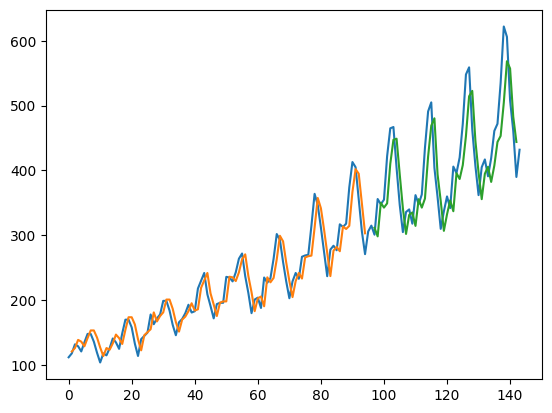

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()